In [14]:
library("ggplot2")
library("dplyr")
library("ggpubr")
library("cowplot")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend




In [32]:
#combine four plots together.
#1. non-normalized body weights
#2. body weight
#3. tooth normalized
#4. distance normalized

#need body weight data, average tooth data, and prominance distance
all_bone_and_tooth_df = read.csv("all_bone_and_tooth_data.csv")
colnames(all_bone_and_tooth_df)

prominance_distance_df = read.csv("all_bone_and_prominence_distances.csv")
#head(prominance_distance_df)

num_samples = nrow(all_bone_and_tooth_df)

all_bone_and_tooth_df$SampleID == prominance_distance_df$SampleID

[1] "SampleID"             "average_tooth_volume" "average_bone_volume" 
[4] "Class"                "tooth_bone_ratio"     "bone_to_tooth_ratio" 
[7] "Weight_grams"

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [33]:
all_bone_and_tooth_df

SampleID,average_tooth_volume,average_bone_volume,Class,tooth_bone_ratio,bone_to_tooth_ratio,Weight_grams
<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
DW_1,0.5859440,0.3376760,Arthritic,0,0.5762940,18.1
DW_2,0.6071840,0.3318490,Arthritic,0,0.5465378,16.0
DW_3,0.6139720,0.3355320,Arthritic,0,0.5464940,17.1
DW_4,0.5971920,0.3010500,Arthritic,0,0.5041092,13.3
DW_5,0.6094280,0.3482920,Arthritic,0,0.5715064,14.3
DW_6,0.6313235,0.4608835,Arthritic,0,0.7300275,19.2
DW_7,0.5841970,0.3125855,Arthritic,0,0.5350687,14.4
DW_8,0.5787315,0.3870045,Non-Arthritic,0,0.6687117,19.3
DW_9,0.5761940,0.4106115,Non-Arthritic,0,0.7126272,25.8


In [121]:
combined_df = data.frame(matrix(data = 0, nrow = num_samples, ncol = 5))
colnames(combined_df) = c("SampleID", "Class", "Weight_grams", "Average_tooth_volume", "prominance_distance")
combined_df$SampleID = all_bone_and_tooth_df$SampleID
combined_df$Class = all_bone_and_tooth_df$Class
combined_df$Weight_grams = all_bone_and_tooth_df$Weight_grams
combined_df$Average_tooth_volume = all_bone_and_tooth_df$average_tooth_volume
combined_df$prominance_distance = prominance_distance_df$prominance_distance
combined_df$Average_bone_volume = all_bone_and_tooth_df$average_bone_volume
combined_df$bone_to_tooth_ratio = all_bone_and_tooth_df$bone_to_tooth_ratio
combined_df$bone_to_prominance_distance = combined_df$Average_bone_volume / combined_df$prominance_distance
combined_df$Class <- factor(combined_df$Class,
                            levels = rev(levels(factor(combined_df$Class))))
head(combined_df)

,SampleID,Class,Weight_grams,Average_tooth_volume,prominance_distance,Average_bone_volume,bone_to_tooth_ratio,bone_to_prominance_distance
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,DW_1,Arthritic,18.1,0.5859440,4.627,0.3376760,0.5762940,0.07297947
2,DW_2,Arthritic,16.0,0.6071840,4.435,0.3318490,0.5465378,0.07482503
3,DW_3,Arthritic,17.1,0.6139720,4.493,0.3355320,0.5464940,0.07467883
4,DW_4,Arthritic,13.3,0.5971920,4.430,0.3010500,0.5041092,0.06795711
5,DW_5,Arthritic,14.3,0.6094280,4.512,0.3482920,0.5715064,0.07719238
6,DW_6,Arthritic,19.2,0.6313235,4.562,0.4608835,0.7300275,0.10102663


In [122]:
# Comparison groups
my_comparisons <- list(c("Arthritic", "Non-Arthritic"))

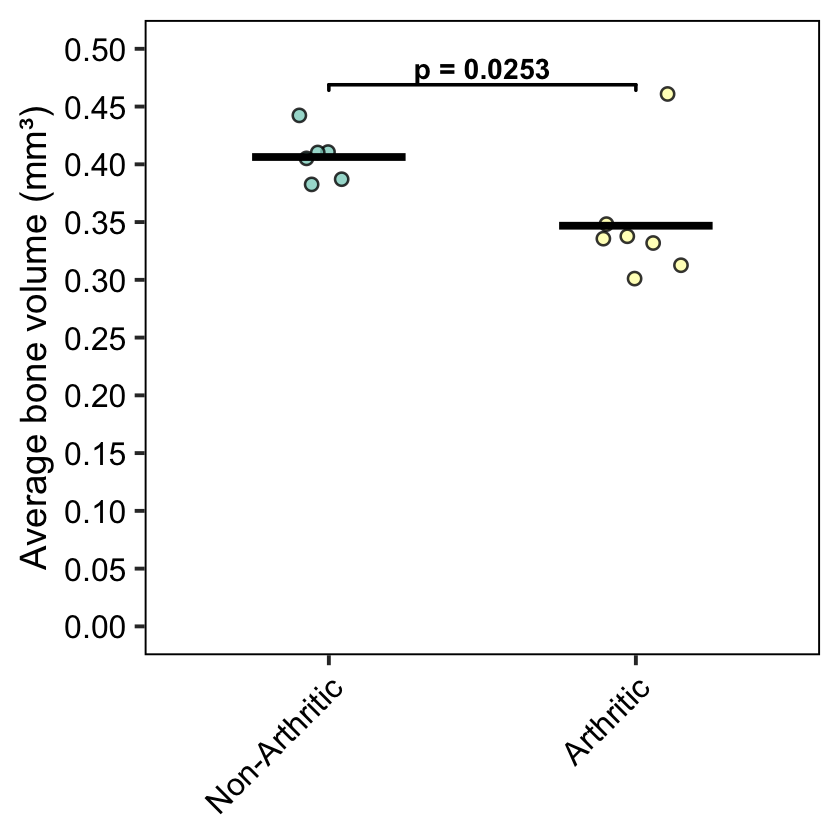

In [123]:
#figure 1A, average bone volume
# create p-value text
# create p-value text
pval_text <- sprintf("p = %.4f",
                     t.test(Average_bone_volume ~ Class,
                            data = combined_df)$p.value)

avg_bone_volume_plot <- ggplot(data = combined_df,
                               aes(x = Class, y = Average_bone_volume, fill = Class)) +
  
  geom_jitter(width = 0.15, size = 3, alpha = 0.8, shape = 21, color = "black") +
  stat_summary(fun = mean, geom = "crossbar", width = 0.5, color = "black", fatten = 2) +
  geom_signif(
    comparisons = my_comparisons,
    annotations = pval_text,
    tip_length = 0.03,
    textsize = 6,
    size = 1,
    color = "black",
    fontface = "bold"
  ) +
  ylab("Average bone volume (mm³)") +
  xlab(NULL) +
  scale_fill_brewer(palette = "Set3", name = NULL) +  # removes the legend title
  theme_bw(base_size = 24) +
  theme(
    axis.text.x = element_text(color = "black", angle = 45, hjust = 1),
    axis.text.y = element_text(color = "black"),
    axis.title = element_text(size = 22),
    plot.title = element_text(size = 24, face = "bold", hjust = 0.5),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "black", fill = NA),
    legend.position = "none"
    # legend.position removed so legend will display
  ) +
  scale_y_continuous(limits = c(0, 0.50),
                     breaks = seq(0, 0.5, by = 0.05))

print(avg_bone_volume_plot)

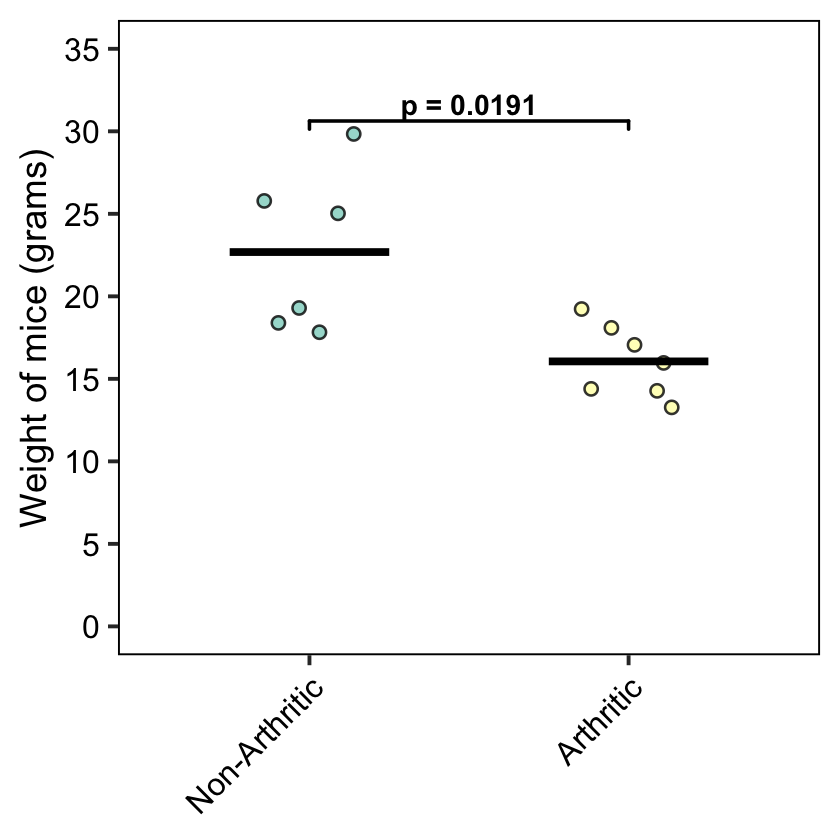

In [130]:
#figure 1B, mice body weight in grams

# create p-value text
pval_text <- sprintf("p = %.4f",
                     t.test(Weight_grams ~ Class,
                            data = combined_df)$p.value)

# Dot plot with numeric p-value and thick bracket
weight_plot <- ggplot(data = combined_df,
                    aes(x = Class, y = Weight_grams, fill = Class)) +
  
  geom_jitter(width = 0.15, size = 3, alpha = 0.8, shape = 21, color = "black") +
  
  stat_summary(fun = mean, geom = "crossbar", width = 0.5, color = "black", fatten = 2) +
  
  geom_signif(
    comparisons = my_comparisons,
    annotations = pval_text,
    tip_length = 0.03,
    textsize = 6,
    size = 1,
    color = "black",
    fontface = "bold"
  ) +
  
  ylab("Weight of mice (grams)") +
  xlab(NULL) +
  scale_fill_brewer(palette = "Set3") +
  theme_bw(base_size = 24) +
  theme(
    axis.text.x = element_text(color = "black", angle = 45, hjust = 1),
    axis.text.y = element_text(color = "black"),
    axis.title = element_text(size = 22),
    plot.title = element_text(size = 24, face = "bold", hjust = 0.5),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "black", fill = NA),
    legend.position = "none"
  ) +
  
  # expand y-limit to make room for the bar
  scale_y_continuous(limits = c(0, 35),
                     breaks = seq(0, 35, by = 5))
print(weight_plot)


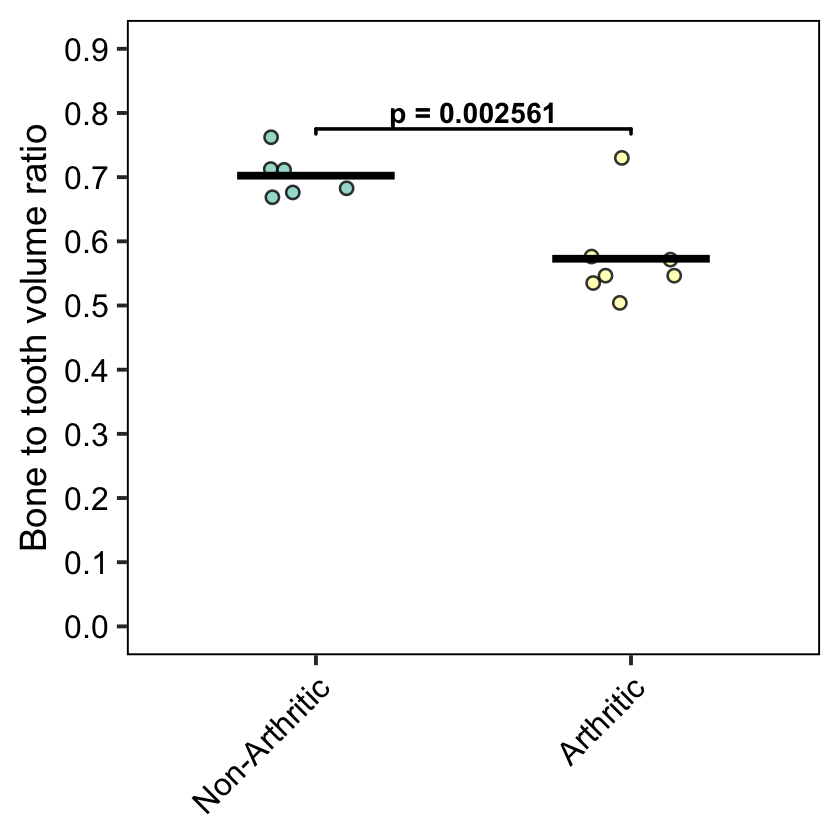

In [125]:
#figure 1C, average bone volume/average tooth volume

# create p-value text
pval_text <- sprintf("p = %.6f",
                     t.test(bone_to_tooth_ratio ~ Class,
                            data = combined_df)$p.value)

# Dot plot with numeric p-value and thick bracket
bone_to_tooth_plot <- ggplot(data = combined_df,
                    aes(x = Class, y = bone_to_tooth_ratio, fill = Class)) +
  
  geom_jitter(width = 0.15, size = 3, alpha = 0.8, shape = 21, color = "black") +
  
  stat_summary(fun = mean, geom = "crossbar", width = 0.5, color = "black", fatten = 2) +
  
  geom_signif(
    comparisons = my_comparisons,
    annotations = pval_text,
    tip_length = 0.03,
    textsize = 6,
    size = 1,
    color = "black",
    fontface = "bold"
  ) +
  
  ylab("Bone to tooth volume ratio") +
  xlab(NULL) +
  scale_fill_brewer(palette = "Set3") +
  theme_bw(base_size = 24) +
  theme(
    axis.text.x = element_text(color = "black", angle = 45, hjust = 1),
    axis.text.y = element_text(color = "black"),
    axis.title = element_text(size = 22),
    plot.title = element_text(size = 24, face = "bold", hjust = 0.5),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "black", fill = NA),
    legend.position = "none"
  ) +
  
  # expand y-limit to make room for the bar
  scale_y_continuous(limits = c(0, 0.9),
                     breaks = seq(0, 0.9, by = 0.1))
print(bone_to_tooth_plot)


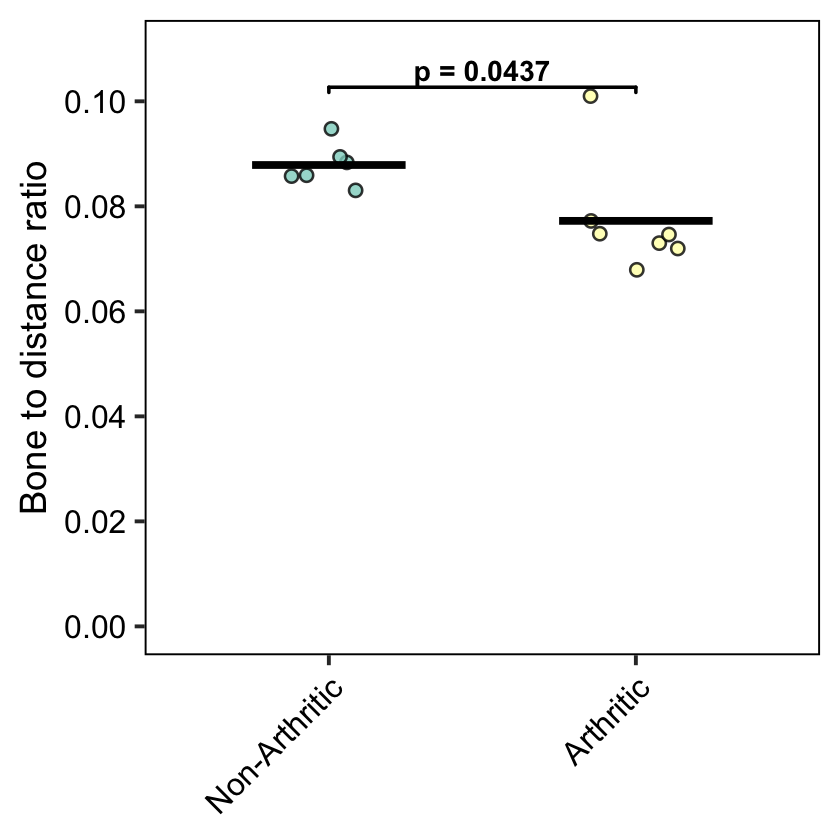

In [126]:
#figure 1D, average bone volume/prominance distance

# create p-value text
pval_text <- sprintf("p = %.4f",
                     t.test(bone_to_prominance_distance ~ Class,
                            data = combined_df)$p.value)

# Dot plot with numeric p-value and thick bracket
bone_to_prominance_dist_plot <- ggplot(data = combined_df,
                    aes(x = Class, y = bone_to_prominance_distance, fill = Class)) +
  
  geom_jitter(width = 0.15, size = 3, alpha = 0.8, shape = 21, color = "black") +
  
  stat_summary(fun = mean, geom = "crossbar", width = 0.5, color = "black", fatten = 2) +
  
  geom_signif(
    comparisons = my_comparisons,
    annotations = pval_text,
    tip_length = 0.03,
    textsize = 6,
    size = 1,
    color = "black",
    fontface = "bold"
  ) +
  
  ylab("Bone to distance ratio") +
  xlab(NULL) +
  scale_fill_brewer(palette = "Set3") +
  theme_bw(base_size = 24) +
  theme(
    axis.text.x = element_text(color = "black", angle = 45, hjust = 1),
    axis.text.y = element_text(color = "black"),
    axis.title = element_text(size = 22),
    plot.title = element_text(size = 24, face = "bold", hjust = 0.5),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "black", fill = NA),
    legend.position = "none"
  ) +
  
  # expand y-limit to make room for the bar
  scale_y_continuous(limits = c(0, 0.11),
                     breaks = seq(0, 0.11, by = 0.02))
print(bone_to_prominance_dist_plot)


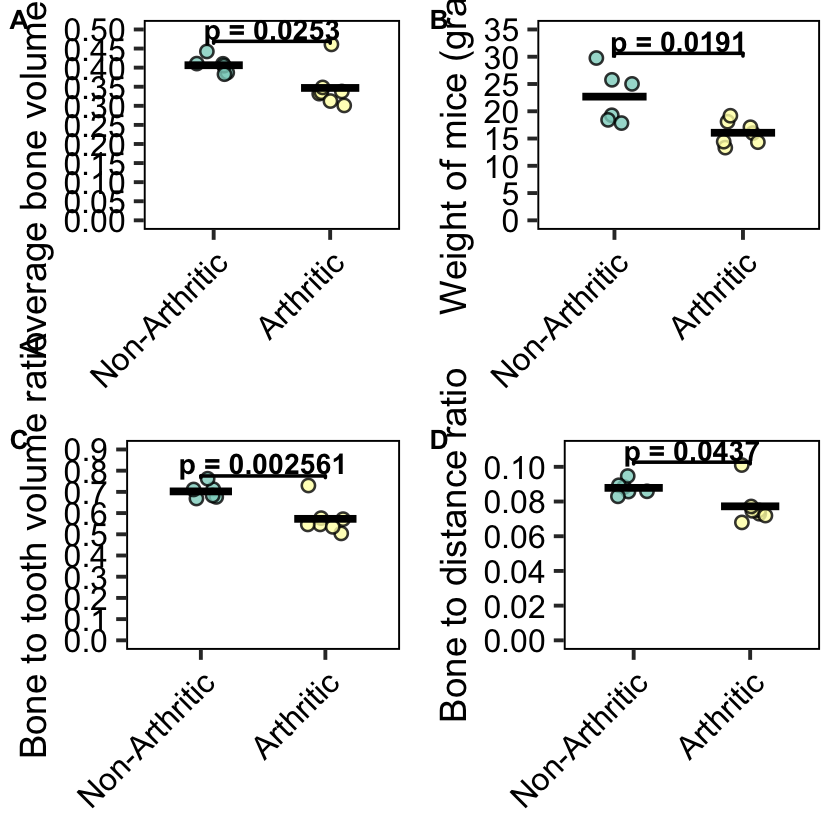

In [131]:
#figure 1A, average bone volume:                      avg_bone_volume_plot
#figure 1B, mice body weight in grams:                weight_plot
#figure 1C, average bone volume/average tooth volume: bone_to_tooth_plot
#figure 1D, average bone volume/prominance distance:  bone_to_prominance_dist_plot

combined_plots = plot_grid(avg_bone_volume_plot, weight_plot, bone_to_tooth_plot, bone_to_prominance_dist_plot, 
                 labels = c("A","B","C","D"),
                 label_size = 16)
print(combined_plots)

In [132]:
pdf(file = "Experiment_1_Figure_1.pdf",   # The directory you want to save the file in
    width = 12, # The width of the plot in inches
    height = 12) # The height of the plot in inches
# Step 2: Create the plot with R code
print(combined_plots)
# Step 3: Run dev.off() to create the file!
dev.off()

agg_record_720654883 
                   2

In [112]:
#save all results
write.csv(combined_df,"all_combined_tooth_and_bone_data.csv", row.names = FALSE)